In this analysis the topmost 100 trips between stations are plotted as a network graph and based on the plot , important information such as stations that generate the maximum trips are highlighted.  

Data source : https://www.kaggle.com/benhamner/sf-bay-area-bike-share/version/2

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import networkx as nx
from networkx.algorithms.distance_measures import eccentricity, radius , diameter , center
from networkx.algorithms.shortest_paths.generic import all_shortest_paths , shortest_path_length

In [3]:
trip_summary = pd.read_csv("trip_summary.csv")
station = pd.read_csv("station.csv")

In [4]:
trip_summary.head()

,start_station_id,end_station_id,n_trips,duration
0,2,2,191,1724363
1,2,3,448,258472
2,2,4,2200,638922
3,2,5,627,365842
4,2,6,1274,570710


In [5]:
trip_summary.shape

(1751, 4)

In [6]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


Select the top 100 total trips between stations.  

In [7]:
max_trips = trip_summary.copy()
max_trips = max_trips.sort_values(['n_trips'] , ascending = False)[:100]
max_trips

,start_station_id,end_station_id,n_trips,duration
1377,69,65,6216,1972347
770,50,60,6164,7793685
1240,65,70,5041,1437680
1082,61,50,4839,2821533
771,50,61,4357,2913319
...,...,...,...,...
775,50,65,1284,1351522
1204,64,69,1283,541142
361,31,29,1278,620410
1543,74,54,1274,822135


Get the station names.  

In [8]:
max_trips = max_trips.merge(station[['id', 'name']] , how = 'left', left_on = 'start_station_id',right_on = 'id' )
max_trips.rename(columns = {'name' : 'start_station_name'}, inplace = True)
max_trips

,start_station_id,end_station_id,n_trips,duration,id,start_station_name
0,69,65,6216,1972347,69,San Francisco Caltrain 2 (330 Townsend)
1,50,60,6164,7793685,50,Harry Bridges Plaza (Ferry Building)
2,65,70,5041,1437680,65,Townsend at 7th
3,61,50,4839,2821533,61,2nd at Townsend
4,50,61,4357,2913319,50,Harry Bridges Plaza (Ferry Building)
...,...,...,...,...,...,...
95,50,65,1284,1351522,50,Harry Bridges Plaza (Ferry Building)
96,64,69,1283,541142,64,2nd at South Park
97,31,29,1278,620410,31,San Antonio Shopping Center
98,74,54,1274,822135,74,Steuart at Market


In [9]:
max_trips = max_trips.merge(station[['id', 'name']] , how = 'left', left_on = 'end_station_id',right_on = 'id' )
max_trips.rename(columns = {'name' : 'end_station_name'}, inplace = True)
max_trips

,start_station_id,end_station_id,n_trips,duration,id_x,start_station_name,id_y,end_station_name
0,69,65,6216,1972347,69,San Francisco Caltrain 2 (330 Townsend),65,Townsend at 7th
1,50,60,6164,7793685,50,Harry Bridges Plaza (Ferry Building),60,Embarcadero at Sansome
2,65,70,5041,1437680,65,Townsend at 7th,70,San Francisco Caltrain (Townsend at 4th)
3,61,50,4839,2821533,61,2nd at Townsend,50,Harry Bridges Plaza (Ferry Building)
4,50,61,4357,2913319,50,Harry Bridges Plaza (Ferry Building),61,2nd at Townsend
...,...,...,...,...,...,...,...,...
95,50,65,1284,1351522,50,Harry Bridges Plaza (Ferry Building),65,Townsend at 7th
96,64,69,1283,541142,64,2nd at South Park,69,San Francisco Caltrain 2 (330 Townsend)
97,31,29,1278,620410,31,San Antonio Shopping Center,29,San Antonio Caltrain Station
98,74,54,1274,822135,74,Steuart at Market,54,Embarcadero at Bryant


In [10]:
max_trips.drop(['id_x','id_y'], axis = 1, inplace = True)
max_trips

,start_station_id,end_station_id,n_trips,duration,start_station_name,end_station_name
0,69,65,6216,1972347,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th
1,50,60,6164,7793685,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome
2,65,70,5041,1437680,Townsend at 7th,San Francisco Caltrain (Townsend at 4th)
3,61,50,4839,2821533,2nd at Townsend,Harry Bridges Plaza (Ferry Building)
4,50,61,4357,2913319,Harry Bridges Plaza (Ferry Building),2nd at Townsend
...,...,...,...,...,...,...
95,50,65,1284,1351522,Harry Bridges Plaza (Ferry Building),Townsend at 7th
96,64,69,1283,541142,2nd at South Park,San Francisco Caltrain 2 (330 Townsend)
97,31,29,1278,620410,San Antonio Shopping Center,San Antonio Caltrain Station
98,74,54,1274,822135,Steuart at Market,Embarcadero at Bryant


In [11]:
## save the file 
max_trips.to_csv("max_trips.csv", index = False)

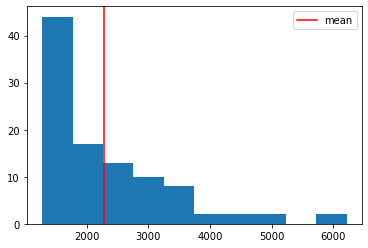

In [12]:
## n_trips distribution
plt.hist(max_trips['n_trips'])
plt.axvline(max_trips['n_trips'].mean() , color = 'red', label = 'mean')
plt.legend()

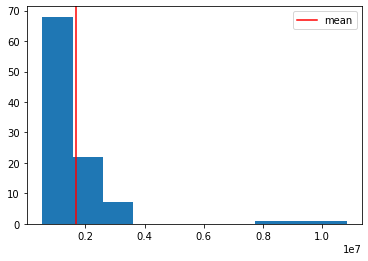

In [13]:
## durationdistribution
plt.hist(max_trips['duration'])
plt.axvline(max_trips['duration'].mean() , color = 'red', label = 'mean')
plt.legend()

In [14]:
## create a network graph 
max_trips_graph = nx.from_pandas_edgelist(max_trips, source='start_station_id', target='end_station_id', edge_attr=True, create_using = nx.MultiDiGraph())


In [15]:
## save the graph

with open("max_trips_graph.p", 'wb') as f:
    pickle.dump(max_trips_graph, f)

In [16]:
print(list(max_trips_graph.edges(data = True))[:2])
print("\n")
print("No of stations and trips : {0} , {1}".format(max_trips_graph.order() , max_trips_graph.size(weight = 'n_trips')))  ## No of stations and Number of trips 
print("No of stations and duration : {0} , {1}".format(max_trips_graph.order() , max_trips_graph.size(weight = 'duration')))  ## No of stations and Number of trips 

[(69, 65, {'start_station_id': 69, 'end_station_id': 65, 'n_trips': 6216, 'duration': 1972347, 'start_station_name': 'San Francisco Caltrain 2 (330 Townsend)', 'end_station_name': 'Townsend at 7th'}), (69, 39, {'start_station_id': 69, 'end_station_id': 39, 'n_trips': 3438, 'duration': 2009268, 'start_station_name': 'San Francisco Caltrain 2 (330 Townsend)', 'end_station_name': 'Powell Street BART'})]


No of stations and trips : 36 , 227784.0
No of stations and duration : 36 , 169698703.0


By selecting the top 100 trips , the station count is reduced to 36 from 70.  
The total number of trips is @ 1/3rd the total trips for the entire data.   
The total duration is (169698703.0/742280971.0). i.e 22% of the entire duration.    

In [18]:
nx.number_of_selfloops(max_trips_graph)

2

In [19]:
list(nx.selfloop_edges(max_trips_graph, data=True))

[(50,
  50,
  {'start_station_id': 50,
   'end_station_id': 50,
   'n_trips': 1733,
   'duration': 10819388,
   'start_station_name': 'Harry Bridges Plaza (Ferry Building)',
   'end_station_name': 'Harry Bridges Plaza (Ferry Building)'}),
 (60,
  60,
  {'start_station_id': 60,
   'end_station_id': 60,
   'n_trips': 2092,
   'duration': 9209028,
   'start_station_name': 'Embarcadero at Sansome',
   'end_station_name': 'Embarcadero at Sansome'})]

Station id 50 and 60 have number of trips originating and ending at them.  

In [20]:
## get the edges 
max_edges = list(nx.get_edge_attributes(max_trips_graph, 'n_trips').keys())
max_edges = [(u,v) for (u,v,i) in max_edges]
max_edges

[(69, 65),
 (69, 39),
 (69, 57),
 (69, 67),
 (69, 50),
 (69, 51),
 (69, 77),
 (65, 70),
 (65, 69),
 (65, 72),
 (65, 50),
 (50, 60),
 (50, 61),
 (50, 70),
 (50, 50),
 (50, 69),
 (50, 48),
 (50, 65),
 (60, 74),
 (60, 50),
 (60, 60),
 (60, 70),
 (70, 50),
 (70, 55),
 (70, 51),
 (70, 74),
 (70, 77),
 (70, 65),
 (70, 63),
 (70, 68),
 (70, 42),
 (70, 61),
 (70, 54),
 (70, 67),
 (70, 60),
 (70, 39),
 (70, 62),
 (70, 41),
 (70, 48),
 (61, 50),
 (61, 74),
 (61, 70),
 (61, 77),
 (74, 61),
 (74, 70),
 (74, 60),
 (74, 69),
 (74, 48),
 (74, 54),
 (51, 70),
 (51, 69),
 (64, 77),
 (64, 70),
 (64, 69),
 (77, 64),
 (77, 70),
 (77, 50),
 (77, 61),
 (77, 60),
 (77, 69),
 (55, 70),
 (55, 69),
 (55, 61),
 (55, 65),
 (55, 57),
 (39, 69),
 (39, 67),
 (39, 70),
 (67, 70),
 (67, 76),
 (67, 69),
 (67, 39),
 (57, 70),
 (57, 69),
 (76, 70),
 (76, 67),
 (72, 65),
 (28, 27),
 (28, 32),
 (27, 28),
 (62, 77),
 (62, 70),
 (63, 70),
 (73, 77),
 (4, 2),
 (2, 4),
 (2, 6),
 (68, 70),
 (54, 70),
 (54, 50),
 (54, 60),
 (56,

In [21]:
trip_value = list(nx.get_edge_attributes(max_trips_graph, 'n_trips').values())
trip_value

[6216,
 3438,
 3005,
 2230,
 1434,
 1406,
 1300,
 5041,
 3495,
 2698,
 1449,
 6164,
 4357,
 3033,
 1733,
 1391,
 1286,
 1284,
 4269,
 3231,
 2092,
 1312,
 3622,
 3510,
 3031,
 2866,
 2598,
 2320,
 2168,
 2097,
 1700,
 1690,
 1678,
 1579,
 1494,
 1406,
 1313,
 1294,
 1288,
 4839,
 2877,
 1510,
 1493,
 3903,
 3477,
 3116,
 2103,
 1290,
 1274,
 3967,
 1572,
 3627,
 1785,
 1283,
 3427,
 2408,
 1549,
 1443,
 1321,
 1303,
 3526,
 2022,
 1974,
 1418,
 1368,
 2854,
 2087,
 1852,
 3190,
 2540,
 2083,
 1732,
 2311,
 1732,
 2797,
 2061,
 2672,
 2666,
 1490,
 2401,
 2465,
 2121,
 2394,
 2332,
 2283,
 2200,
 1274,
 2094,
 2054,
 1486,
 1318,
 2042,
 1594,
 1677,
 1575,
 1493,
 1457,
 1449,
 1337,
 1278]

In [23]:
## create the edge label dictionary with the two lists above.
edge_lbl = {}
for i in range(len(max_edges)):
    edge_lbl[max_edges[i]] = trip_value[i]
##
edge_lbl

{(69, 65): 6216,
 (69, 39): 3438,
 (69, 57): 3005,
 (69, 67): 2230,
 (69, 50): 1434,
 (69, 51): 1406,
 (69, 77): 1300,
 (65, 70): 5041,
 (65, 69): 3495,
 (65, 72): 2698,
 (65, 50): 1449,
 (50, 60): 6164,
 (50, 61): 4357,
 (50, 70): 3033,
 (50, 50): 1733,
 (50, 69): 1391,
 (50, 48): 1286,
 (50, 65): 1284,
 (60, 74): 4269,
 (60, 50): 3231,
 (60, 60): 2092,
 (60, 70): 1312,
 (70, 50): 3622,
 (70, 55): 3510,
 (70, 51): 3031,
 (70, 74): 2866,
 (70, 77): 2598,
 (70, 65): 2320,
 (70, 63): 2168,
 (70, 68): 2097,
 (70, 42): 1700,
 (70, 61): 1690,
 (70, 54): 1678,
 (70, 67): 1579,
 (70, 60): 1494,
 (70, 39): 1406,
 (70, 62): 1313,
 (70, 41): 1294,
 (70, 48): 1288,
 (61, 50): 4839,
 (61, 74): 2877,
 (61, 70): 1510,
 (61, 77): 1493,
 (74, 61): 3903,
 (74, 70): 3477,
 (74, 60): 3116,
 (74, 69): 2103,
 (74, 48): 1290,
 (74, 54): 1274,
 (51, 70): 3967,
 (51, 69): 1572,
 (64, 77): 3627,
 (64, 70): 1785,
 (64, 69): 1283,
 (77, 64): 3427,
 (77, 70): 2408,
 (77, 50): 1549,
 (77, 61): 1443,
 (77, 60): 132

In [24]:
## sort and select the top 10 total trips 
edge_lbl_sorted = dict(sorted(edge_lbl.items(), key=lambda item: item[1] , reverse = True))
edge_lbl_sorted

{(69, 65): 6216,
 (50, 60): 6164,
 (65, 70): 5041,
 (61, 50): 4839,
 (50, 61): 4357,
 (60, 74): 4269,
 (51, 70): 3967,
 (74, 61): 3903,
 (64, 77): 3627,
 (70, 50): 3622,
 (55, 70): 3526,
 (70, 55): 3510,
 (65, 69): 3495,
 (74, 70): 3477,
 (69, 39): 3438,
 (77, 64): 3427,
 (60, 50): 3231,
 (67, 70): 3190,
 (74, 60): 3116,
 (50, 70): 3033,
 (70, 51): 3031,
 (69, 57): 3005,
 (61, 74): 2877,
 (70, 74): 2866,
 (39, 69): 2854,
 (76, 70): 2797,
 (65, 72): 2698,
 (72, 65): 2672,
 (28, 27): 2666,
 (70, 77): 2598,
 (67, 76): 2540,
 (62, 77): 2465,
 (77, 70): 2408,
 (27, 28): 2401,
 (63, 70): 2394,
 (73, 77): 2332,
 (70, 65): 2320,
 (57, 70): 2311,
 (4, 2): 2283,
 (69, 67): 2230,
 (2, 4): 2200,
 (70, 63): 2168,
 (62, 70): 2121,
 (74, 69): 2103,
 (70, 68): 2097,
 (68, 70): 2094,
 (60, 60): 2092,
 (39, 67): 2087,
 (67, 69): 2083,
 (76, 67): 2061,
 (54, 70): 2054,
 (56, 70): 2042,
 (55, 69): 2022,
 (55, 61): 1974,
 (39, 70): 1852,
 (64, 70): 1785,
 (50, 50): 1733,
 (67, 39): 1732,
 (57, 69): 1732,
 

In [25]:
## first 10 top trips 
top_10 = list(edge_lbl_sorted.keys())[:10]
edge_lbl_10 = { n : edge_lbl[n] for n in top_10}
edge_lbl_10


{(69, 65): 6216,
 (50, 60): 6164,
 (65, 70): 5041,
 (61, 50): 4839,
 (50, 61): 4357,
 (60, 74): 4269,
 (51, 70): 3967,
 (74, 61): 3903,
 (64, 77): 3627,
 (70, 50): 3622}

Create three sets of edges based on the edge weight i.e based on n_trips.  
This is done to display the edges in three different colors based on the total trips between stations.  


In [26]:
e_1 ={}
e_2 = {}
e_3 = {}
for k,v in edge_lbl.items():
    if v <= 2500:
        e_1[k] = v
    elif v <= 4000:
        e_2[k] =v
    else:
        e_3[k] =v
##
print(e_1)
print(e_2)
print(e_3)

{(69, 67): 2230, (69, 50): 1434, (69, 51): 1406, (69, 77): 1300, (65, 50): 1449, (50, 50): 1733, (50, 69): 1391, (50, 48): 1286, (50, 65): 1284, (60, 60): 2092, (60, 70): 1312, (70, 65): 2320, (70, 63): 2168, (70, 68): 2097, (70, 42): 1700, (70, 61): 1690, (70, 54): 1678, (70, 67): 1579, (70, 60): 1494, (70, 39): 1406, (70, 62): 1313, (70, 41): 1294, (70, 48): 1288, (61, 70): 1510, (61, 77): 1493, (74, 69): 2103, (74, 48): 1290, (74, 54): 1274, (51, 69): 1572, (64, 70): 1785, (64, 69): 1283, (77, 70): 2408, (77, 50): 1549, (77, 61): 1443, (77, 60): 1321, (77, 69): 1303, (55, 69): 2022, (55, 61): 1974, (55, 65): 1418, (55, 57): 1368, (39, 67): 2087, (39, 70): 1852, (67, 69): 2083, (67, 39): 1732, (57, 70): 2311, (57, 69): 1732, (76, 67): 2061, (28, 32): 1490, (27, 28): 2401, (62, 77): 2465, (62, 70): 2121, (63, 70): 2394, (73, 77): 2332, (4, 2): 2283, (2, 4): 2200, (2, 6): 1274, (68, 70): 2094, (54, 70): 2054, (54, 50): 1486, (54, 60): 1318, (56, 70): 2042, (42, 70): 1594, (32, 28): 167

In [29]:
node_list = list(e_3.keys())

display_nodes  = [n[0] for n in node_list] + [n[1] for n in node_list] 
display_nodes = list(set(display_nodes))
display_nodes

[65, 69, 70, 74, 50, 60, 61]

In [43]:
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


Assign node names i.e station names.  

In [58]:
station_name_dict = station[['id','name']].set_index(['id']).to_dict()
station_name_dict['name']

{2: 'San Jose Diridon Caltrain Station',
 3: 'San Jose Civic Center',
 4: 'Santa Clara at Almaden',
 5: 'Adobe on Almaden',
 6: 'San Pedro Square',
 7: 'Paseo de San Antonio',
 8: 'San Salvador at 1st',
 9: 'Japantown',
 10: 'San Jose City Hall',
 11: 'MLK Library',
 12: 'SJSU 4th at San Carlos',
 13: 'St James Park',
 14: 'Arena Green / SAP Center',
 16: 'SJSU - San Salvador at 9th',
 21: 'Franklin at Maple',
 22: 'Redwood City Caltrain Station',
 23: 'San Mateo County Center',
 24: 'Redwood City Public Library',
 25: 'Stanford in Redwood City',
 26: 'Redwood City Medical Center',
 27: 'Mountain View City Hall',
 28: 'Mountain View Caltrain Station',
 29: 'San Antonio Caltrain Station',
 30: 'Evelyn Park and Ride',
 31: 'San Antonio Shopping Center',
 32: 'Castro Street and El Camino Real',
 33: 'Rengstorff Avenue / California Street',
 34: 'Palo Alto Caltrain Station',
 35: 'University and Emerson',
 36: 'California Ave Caltrain Station',
 37: 'Cowper at University',
 38: 'Park at Ol

In [59]:
nx.set_node_attributes(max_trips_graph, station_name_dict['name'], "name")

In [62]:
station_names = nx.get_node_attributes(max_trips_graph, 'name')
station_names 

{69: 'San Francisco Caltrain 2 (330 Townsend)',
 65: 'Townsend at 7th',
 50: 'Harry Bridges Plaza (Ferry Building)',
 60: 'Embarcadero at Sansome',
 70: 'San Francisco Caltrain (Townsend at 4th)',
 61: '2nd at Townsend',
 74: 'Steuart at Market',
 51: 'Embarcadero at Folsom',
 64: '2nd at South Park',
 77: 'Market at Sansome',
 55: 'Temporary Transbay Terminal (Howard at Beale)',
 39: 'Powell Street BART',
 67: 'Market at 10th',
 57: '5th at Howard',
 76: 'Market at 4th',
 72: 'Civic Center BART (7th at Market)',
 28: 'Mountain View Caltrain Station',
 27: 'Mountain View City Hall',
 62: '2nd at Folsom',
 63: 'Howard at 2nd',
 73: 'Grant Avenue at Columbus Avenue',
 4: 'Santa Clara at Almaden',
 2: 'San Jose Diridon Caltrain Station',
 68: 'Yerba Buena Center of the Arts (3rd @ Howard)',
 54: 'Embarcadero at Bryant',
 56: 'Beale at Market',
 42: 'Davis at Jackson',
 32: 'Castro Street and El Camino Real',
 41: 'Clay at Battery',
 49: 'Spear at Folsom',
 82: 'Broadway St at Battery St',

In [67]:
display_station_names = {}
for i in display_nodes:
    display_station_names[i] = station_names[i]
    
##
display_station_names
    

{65: 'Townsend at 7th',
 69: 'San Francisco Caltrain 2 (330 Townsend)',
 70: 'San Francisco Caltrain (Townsend at 4th)',
 74: 'Steuart at Market',
 50: 'Harry Bridges Plaza (Ferry Building)',
 60: 'Embarcadero at Sansome',
 61: '2nd at Townsend'}

Draw the graph as follows:  
Mark the station with top most 10 total trips between stations. 
Display the top 2 groups of total trips i.e trips greater than 4000 marked in green lines and that between 2500 and 4000 marked in blue lines.  

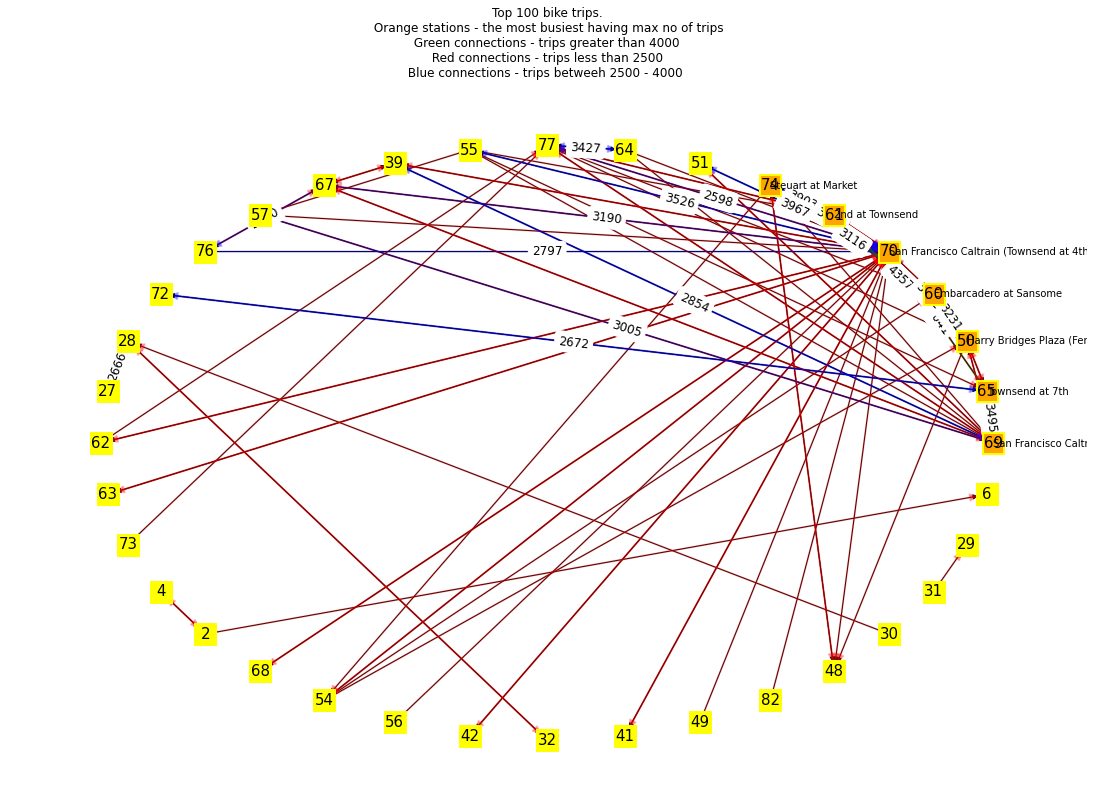

In [88]:
## plot the top  100 trips 

plt.figure(figsize = (15,10))
circ_pos = nx.circular_layout(max_trips_graph) 

#
nx.draw(max_trips_graph,circ_pos)

#
nx.draw_networkx_nodes(max_trips_graph, circ_pos,  alpha=1, node_shape = 's', node_size = 500, node_color = 'yellow')
## stations with maximum number of trips
nx.draw_networkx_nodes(max_trips_graph, circ_pos, nodelist= display_nodes  , node_color='orange', alpha=1, node_shape = 's')
#nx.draw_networkx_nodes(graph_1, circ_pos, nodelist= least_connections_nodes, node_color='pink', alpha=1, node_shape = 's')

# display edges with colors based on the total number of trips 
nx.draw_networkx_edges(max_trips_graph,circ_pos,
                       edgelist= list(e_1.keys()),
                      width=2,alpha=0.3,edge_color='red', style = 'dashed', arrowsize = 15) ## dashed line not appearing
nx.draw_networkx_edges(max_trips_graph,circ_pos,
                       edgelist= list(e_2.keys()),
                      width=2,alpha=0.3,edge_color='blue', style = 'dashed', arrowsize = 15) ## dashed line not appearing
nx.draw_networkx_edges(max_trips_graph,circ_pos,
                       edgelist= list(e_3.keys()),
                      width=2,alpha=0.3,edge_color='green', style = 'dashed', arrowsize = 15) ## dashed line not appearing

## node labels 
node_name={}
for node in max_trips_graph.nodes():
    node_name[node]=str(node)

nx.draw_networkx_labels(max_trips_graph, circ_pos,font_size=15, node_shape = 's', node_size = 500)
nx.draw_networkx_labels(max_trips_graph, circ_pos,display_station_names,font_size=10, node_shape = 's', node_size = 600 , horizontalalignment = 'left', clip_on = False)
##
plt.title("Top 100 bike trips.\n Orange stations - the most busiest having max no of trips\n Green connections - trips greater than 4000 \n Red connections - trips less than 2500 \n Blue connections - trips betweeh 2500 - 4000  ")
## edge labels for top 10 trips
nx.draw_networkx_edge_labels(max_trips_graph,circ_pos,font_size=12, edge_labels = edge_lbl_10, label_pos = 0.5, color = 'red')
## edge label for the stations with second most highest trips
nx.draw_networkx_edge_labels(max_trips_graph,circ_pos,font_size=12, edge_labels = e_2, label_pos = 0.5)

plt.show()